# CART (Classification and Regression Trees)

# Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [5]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [6]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [7]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_leaf_nodes=10)
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        

In [8]:
# dallanma ve kırılmaların arkaplanda nasıl gerçekleştiğine bakalım

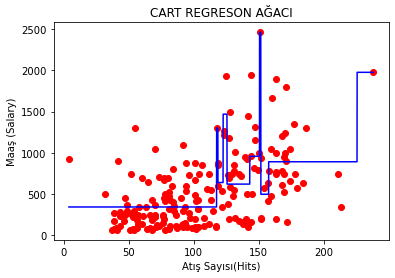

In [9]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  # Regresyon kural noktalarını görebilmek için grid oluşturduk
plt.scatter(X_train, y_train, color = 'red') # salary ve hit değişkenleri için scatterplot oluşturduk
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue') # tahmin değerlerini grid yardımıyla ekledik
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;
# max_leaf_nodes'un temel değeri sonsuzdur ve alttaki grafik oluşur

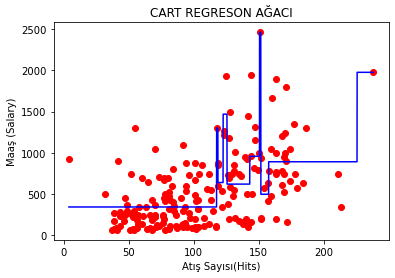

In [10]:
# ŞİMDİ BİR HİPERPARAMETREYİ DEĞİŞTİREREK AĞACIN YAPISININ NASIL DEĞİŞECEĞİNİ GÖZLEMLEYELİM(max_leaf_nodes)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;
# max_leaf_nodes = 10 verirsek alttaki grafik oluşur
# Burada X eksenindeki bağımsız değişkene göre bölme işlemleri gerçekleşiyor

Bizim burada amacımız ise bu parametrenin (örnekteki max_leaf_nodes) insan eli değmeden optimum değerini bulmak olacak.

#### Bu modeli bir de ağaç yapısı olarak görselleştirmek istersek:

Mesela modeli kurduk ağaç yapısını oluşturduk, iş geliştirme departmanı bize diyor ki:

"Modeli kurdun ama bize bir kural seti ver ve biz bu kural setini sisteme entegre edip bağımsız değişken değerleri geldiğinde bu kural setini kullanarak tahmin değerleri oluşturabilelim."

"Kural seti öyle bir kural seti olsun ki derlenmesi anlamında pythona uyarlı olsun ve biz bazı argümanları girince tahmin üretsin."

### Böyle bir işlemle karşılaşırsak şu şekilde kural yapısını üretebiliriz:

In [11]:
#!pip install skompiler

In [12]:
from skompiler import skompile

In [13]:
# bu fonksiyon aracılığı ile oluşturduğumuz modelin kural setini dışarı çıkartmış olacağız

In [14]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



# Tahmin

In [15]:
x = [91] # çünkü aşağıda tahmin kısmını x[0] üzerinden yapıyor

In [16]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

İş yerindeyseniz ve yaptığınız modeli implimente etmeniz isteniyor ise bunu svr ve doğrusal modelle nasıl yapacağımızı görmüştük.

Karar ağacı ile de model yaptığımızda bunun implimente edilmesi (canlı sisteme entegrasyonu) olayı da yukarıdaki gibidir.

Bu kural setini alıp sisteme gömün demektir (kural zaten python kodudur.)

#### Mesela bir fonksiyon oluşturulabilir, fonksiyon istenen girdiyi alır (x) ve sonucu verir

In [17]:
# şimdi de klasik anlamda bir tahmin işlemi yaparak bunu doğrulayalım

In [18]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [19]:
cart_model.predict([[91]]) # yine 91'i tahmin ediyoruz

array([345.20115517])

In [20]:
# ilkel test hatamızı da hesaplayalım

In [21]:
y_pred = cart_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

# Model Tuning

In [23]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [25]:
# şimdi birkaç parametreyi kendimiz kurcalayarak oluşacak değerlere bakalım

In [26]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

455.8367349677217

In [27]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 20)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

446.72035850924783

In [28]:
# bir parametre daha ekleyelim

In [29]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 20, min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

446.72035850924783

# ------------------------------------------------------------

In [30]:
# Şimdi biraz elimizle denedikten sonra modelimizi GridSearchCV ile parametrelerini aratalım

In [31]:
cart_params = {"min_samples_split": range(2, 10), 
               "max_leaf_nodes" : range(2, 10)}

In [32]:
cart_model_cv = GridSearchCV(cart_model, cart_params, cv = 10)

In [33]:
cart_model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=20),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [34]:
cart_model_cv.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

Burada iki hiperparametreyi 2 görünce bir sorun olmuş olabileceeğini düşündük.

Hiperparametre optimizasyonu dünyasında YSA'da da belirttiğimiz üzere öyle bir parametre seti verlir ki onun başka bir kombinasyonuna da benzer bir şey elde edebilirsiniz. 

Bu sebeple gelişmiş hiperparametre optimizasyonu konusu ile de ele alacağımız olaylarda şöyle bir yaklaşım yapılabilir:

1. Defapult parametrelere bakmak gerekir
2. O algoritmanın sunduğu parametreler etrafında değerler vermek gerekir (Özellikle o problem bazında parametre deneyimi yoksa)

Yukarda range(2, 20) verince algoritmayı tanıyan birisi bunun bir hata olmuş olabileceğini anlar çünkü algoritma karakteristiğini az çok tanıyordur. 

Bundan sonra range(2, 100) yaparak bir daha deneriz çünkü algoritma o aralıkta daha iyi hiperparametreler bulacak olabilir.

"Hangi aralıktaki değerleri daha iyi bulabileceğini nasıl bulabiliriz ki?":

1. Algoritmaın ön tanımlı değerlerinden fikir alarak aralıklar verilebilir
2. Biraz algoritmanın karakteristiği biliniyorsa buna göre değerler verilebilir

In [35]:
cart_params = {"min_samples_split": range(2, 100), 
               "max_leaf_nodes" : range(2, 10)}

In [36]:
cart_model_cv = GridSearchCV(cart_model, cart_params, cv = 10)

In [37]:
cart_model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=20),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [38]:
cart_model_cv.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

Yukarıda gördüğümüz gibi tekrar çalıştırınca değerler değişti.

Hiperparametre optimizasyonu konusu biraz risklidir.

Kişisel öneri: "Ön tanımlı değerlerden parametrelere gidip belirli değerleri gördükten sonra parametre aramalarına gidilebilir."

In [39]:
# Final modelin oluşturulması

In [40]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [41]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [42]:
y_pred = cart_tuned.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

Hata 423'e geriledi ama hala yüksek denebilecek bir hata. Bunun sebebi şuan ağacımızı tek değişkenle çalıştırıyor olmamız.

### Şimdi bir de bütün değişkenleri kullanarak tune edilmiş ağacımızı çalıştıralım:

Bunu yapmamızın sebebi bağımlı değişkendeki değişim eklenecek yeni bağımsız değişkenlerle daha iyi açıklanabileceğinden (önceki tecrübelerimizde öyle olmuştu) daha doğru kararlar vermemizi sağlayabilir.

In [44]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [45]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred)) # ilkel hatamıza bir daha baktık

485.04366301547503

In [47]:
# Çok değişkenli modelimizi tune edelim

In [48]:
cart_params = {"min_samples_split": range(2, 100), 
               "max_leaf_nodes" : range(2, 20)}

In [49]:
cart_model_cv = GridSearchCV(cart_model, cart_params, cv = 10)

In [50]:
cart_model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 20),
                         'min_samples_split': range(2, 100)})

In [51]:
cart_model_cv.best_params_

{'max_leaf_nodes': 14, 'min_samples_split': 37}

In [52]:
# Çok değişkenli final modelimizi oluşturalım

In [53]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 13, min_samples_split = 37)

In [54]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=13, min_samples_split=37)

In [55]:
y_pred = cart_tuned.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.01595709815194

Bütün değişkenleri kullanıp tune etme işlemi sonucunda hata değerimiz YSA'ları ile benzer seviyelere düştü.